### Load packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from pickle import FALSE, TRUE
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

### Load the label sentiment data (with stock label)

In [19]:

df_twitter=pd.read_csv("./Data/Combined.csv")
df_twitter["Label"].unique()
df_twitter

,Date,Tweets_clean_more,polarity,subjectivity,sentiment,Label
0,2013-01-10,to super clear i dont wish could i mandat anyt...,0.216667,0.525000,positive,Decrease
1,2019-01-10,ye get regulatori pushback may avail region go...,0.123333,0.490556,positive,Increase
2,2020-01-10,dome barrel weld made bar pretti good bar need...,0.411111,0.570988,positive,Decrease
3,2012-01-11,the exec conf room tesla use call denali i dec...,0.600000,1.000000,positive,Increase
4,2016-01-11,sad hear david bowi die he amaz,-0.500000,1.000000,negative,Decrease
...,...,...,...,...,...,...
1417,2020-09-08,a la guerr comm à la guerr haha and start twee...,0.100000,0.400000,positive,Decrease
1418,2014-09-09,meet build call just crazi japanes game show ...,-0.400000,0.400000,negative,Decrease
1419,2016-09-09,thought ope space new much appreci most like t...,0.046780,0.398295,positive,Decrease
1420,2019-09-09,distanc firebal small move far even high at g ...,0.038659,0.583321,positive,Increase


### Caculate the accurancy of sentiment results and correspond stock price Label

In [37]:
sentiment_label=df_twitter["sentiment"]
stockPrice_label=df_twitter["Label"]

label_encoder = LabelEncoder()

sentiment_labels = label_encoder.fit_transform(sentiment_label)

print("---------------Transform sentiment result(labels) to numbers---------------")
print(label_encoder.classes_)
print("Correspond numbers",set(list(sentiment_labels)))


print("---------------Change the Stock price label to numbers based on the rule---------------")

for i in range(len(stockPrice_label)):
    while stockPrice_label[i]=="Decrease":
        stockPrice_label[i]=0
    while stockPrice_label[i]=="No Change":
        stockPrice_label[i]=1
    while stockPrice_label[i]=="Increase":
        stockPrice_label[i]=2
        



---------------Transform sentiment result(labels) to numbers---------------
['negative' 'neutral' 'positive']
Correspond numbers {0, 1, 2}
---------------Change the Stock price label to numbers based on the rule---------------


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Get the transformed data

In [38]:
df_acc=pd.DataFrame([stockPrice_label,sentiment_labels]).T
df_acc.columns=["stock label","sentiment label"]
df_acc

,stock label,sentiment label
0,0,2
1,2,2
2,0,2
3,2,2
4,0,0
...,...,...
1417,0,2
1418,0,0
1419,0,2
1420,2,2


### Get the confusion matrix of stock label and sentiment label

In [48]:
CM=confusion_matrix(df_acc["stock label"],df_acc["sentiment label"])
CM

array([[ 68, 144, 481],
       [  3,  13,  25],
       [ 84, 126, 478]])

### Visualize the confusion matrix
*  The true label is stock label
   * Decrease = 0
   * No change = 1
   * Increase = 2
* The Predict label is sentiment label
   * Negative =0
   * netural =1
   * Positive =2


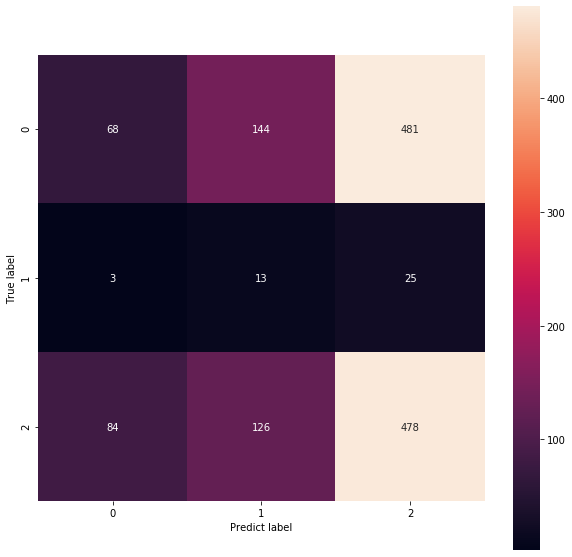

In [49]:
labels=list(df_twitter["Label"].unique())
plt.figure(figsize=(10,10))
sns.heatmap(CM,square=TRUE,fmt='d',cbar=FALSE,annot=True)
plt.xlabel('Predict label')
plt.ylabel("True label");

### Get the classification report 
* We caculate each lable's Coincidence degree by ploting the classification report

In [54]:
print(classification_report(df_acc["sentiment label"],df_acc["stock label"]));

              precision    recall  f1-score   support

           0       0.10      0.44      0.16       155
           1       0.32      0.05      0.08       283
           2       0.69      0.49      0.57       984

    accuracy                           0.39      1422
   macro avg       0.37      0.32      0.27      1422
weighted avg       0.55      0.39      0.43      1422



### Get the overall accuracy

In [53]:
accuracy_score(df_acc["sentiment label"],df_acc["stock label"])

0.3931082981715893

### Merge the sentiment label data with stock price data

* Let's review our dataset and merge them by Date column

In [30]:
df_lh=pd.read_csv("./Data/TSLA_labeled.csv")



In [31]:
df_twitter.head()

,Date,Tweets_clean_more,polarity,subjectivity,sentiment,Label
0,2013-01-10,to super clear i dont wish could i mandat anyt...,0.216667,0.525000,positive,Decrease
1,2019-01-10,ye get regulatori pushback may avail region go...,0.123333,0.490556,positive,Increase
2,2020-01-10,dome barrel weld made bar pretti good bar need...,0.411111,0.570988,positive,Decrease
3,2012-01-11,the exec conf room tesla use call denali i dec...,0.600000,1.000000,positive,Increase
4,2016-01-11,sad hear david bowi die he amaz,-0.500000,1.000000,negative,Decrease


In [32]:
df_lh.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Label
0,2011-12-01,2.171333,2.266000,2.132000,2.173333,2.173333,15453000,Increase
1,2011-12-02,2.188667,2.246000,2.160000,2.220000,2.220000,12042000,Increase
2,2011-12-05,2.235333,2.333333,2.228667,2.294667,2.294667,17401500,Increase
3,2011-12-06,2.280000,2.332000,2.268667,2.324667,2.324667,14277000,Increase
4,2011-12-07,2.308667,2.326000,2.253333,2.279333,2.279333,10114500,Decrease


In [33]:
df_combind=df_lh.merge(df_twitter)
df_combind.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Label,Tweets_clean_more,polarity,subjectivity,sentiment
0,2011-12-01,2.171333,2.266000,2.132000,2.173333,2.173333,15453000,Increase,i made volum model s go now i need work miniat...,0.300000,0.200000,positive
1,2011-12-21,1.860667,1.871333,1.735333,1.838000,1.838000,25582500,Decrease,yeah realli mom attest not sure i handl char m...,0.377273,0.708687,positive
2,2011-12-22,1.840000,1.870000,1.820000,1.851333,1.851333,15141000,Increase,model s option perform red black i deliv car j...,0.090476,0.376190,positive
3,2011-12-28,1.932667,1.949333,1.869333,1.900667,1.900667,8628000,Decrease,if ever want know real truth moon land best on...,0.600000,0.300000,positive
4,2011-12-29,1.906000,1.956000,1.903333,1.915333,1.915333,7323000,Increase,cool person essay it realli reson i felt way c...,0.132857,0.438571,positive


In [34]:
label_line=np.array(df_combind["High"])-np.array(df_combind["Low"])/2
df_combind[" half_H_L"]=label_line
df_combind.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Label,Tweets_clean_more,polarity,subjectivity,sentiment,half_H_L
0,2011-12-01,2.171333,2.266000,2.132000,2.173333,2.173333,15453000,Increase,i made volum model s go now i need work miniat...,0.300000,0.200000,positive,1.200000
1,2011-12-21,1.860667,1.871333,1.735333,1.838000,1.838000,25582500,Decrease,yeah realli mom attest not sure i handl char m...,0.377273,0.708687,positive,1.003667
2,2011-12-22,1.840000,1.870000,1.820000,1.851333,1.851333,15141000,Increase,model s option perform red black i deliv car j...,0.090476,0.376190,positive,0.960000
3,2011-12-28,1.932667,1.949333,1.869333,1.900667,1.900667,8628000,Decrease,if ever want know real truth moon land best on...,0.600000,0.300000,positive,1.014666
4,2011-12-29,1.906000,1.956000,1.903333,1.915333,1.915333,7323000,Increase,cool person essay it realli reson i felt way c...,0.132857,0.438571,positive,1.004333


In [36]:
df_combind.to_csv("./Data/combind_sen_stock.csv")